## Exercise 5
### Classification and Clustering
### Amir - 2022
# ....................... 


In [1]:
''' 
1- Open creditcard2_smaller.csv file
2- there are roughly 10000 credit card transactions information saved here
3- for each transaction, there are 29 features (columns 0 to 28), and a transaction class label (column 29) 
4- class label== 0 --> a valid transaction, whereas class label== 1 --> a fraudulent transaction
5- plot the histogram of class labels, what you can get from that?
6- keep 70% of your samples for training, and 30% for testing. 
7- develop a decision tree classifier, train it, and test it. 
8- report the confusion matrix and the classification report
9- Try to optimize the parameters and run the program once again
10- report the best results achived
11- What Is The Biggest Weakness of your classifier?
12- repeat steps 7 to 11 for a logistic regressor model

'''

' \n1- Open creditcard2_smaller.csv file\n2- there are roughly 10000 credit card transactions information saved here\n3- for each transaction, there are 29 features (columns 0 to 28), and a transaction class label (column 29) \n4- class label== 0 --> a valid transaction, whereas class label== 1 --> a fraudulent transaction\n5- plot the histogram of class labels, what you can get from that?\n6- keep 70% of your samples for training, and 30% for testing. \n7- develop a decision tree classifier, train it, and test it. \n8- report the confusion matrix and the classification report\n9- Try to optimize the parameters and run the program once again\n10- report the best results achived\n11- What Is The Biggest Weakness of your classifier?\n12- repeat steps 7 to 11 for a logistic regressor model\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
df = pd.read_csv('creditcard2_smaller.csv')

In [3]:
df.shape

(9969, 30)

In [4]:
df.columns

Index(['1.059387115', '-0.175319187', '1.266129643', '1.186109955',
       '-0.786001753', '0.578435276', '-0.767084276', '0.401046149',
       '0.699499676', '-0.064737556', '1.048292488', '1.005618365',
       '-0.542001579', '-0.039914502', '-0.218683248', '0.004475682',
       '-0.193554039', '0.042387962', '-0.277833721', '-0.178023367',
       '0.013676294', '0.21373361', '0.014461849', '0.00295086', '0.294638015',
       '-0.395069505', '0.081461117', '0.024220349', '12.99', '0'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1.059387115   9969 non-null   float64
 1   -0.175319187  9969 non-null   float64
 2   1.266129643   9969 non-null   float64
 3   1.186109955   9969 non-null   float64
 4   -0.786001753  9969 non-null   float64
 5   0.578435276   9969 non-null   float64
 6   -0.767084276  9969 non-null   float64
 7   0.401046149   9969 non-null   float64
 8   0.699499676   9969 non-null   float64
 9   -0.064737556  9969 non-null   float64
 10  1.048292488   9969 non-null   float64
 11  1.005618365   9969 non-null   float64
 12  -0.542001579  9969 non-null   float64
 13  -0.039914502  9969 non-null   float64
 14  -0.218683248  9969 non-null   float64
 15  0.004475682   9969 non-null   float64
 16  -0.193554039  9969 non-null   float64
 17  0.042387962   9969 non-null   float64
 18  -0.277833721  9969 non-null 

In [6]:
df.head()

,1.059387115,-0.175319187,1.266129643,1.186109955,-0.786001753,0.578435276,-0.767084276,0.401046149,0.699499676,-0.064737556,...,0.013676294,0.21373361,0.014461849,0.00295086,0.294638015,-0.395069505,0.081461117,0.024220349,12.99,0
0,1.154312,0.265462,0.384871,0.575007,-0.217475,-0.391520,-0.081489,0.062789,-0.260583,-0.161677,...,-0.193213,-0.557685,0.169492,0.186863,0.089252,0.093626,-0.009633,0.019668,2.67,0
1,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,0.017276,...,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0
2,-1.165722,1.485337,0.156418,0.924378,0.131746,0.996965,-0.167117,1.262617,-0.584844,-0.553366,...,0.314752,1.046648,0.156404,-0.628123,-0.702367,-0.224025,0.145425,0.116398,11.83,0
3,-0.853807,0.127392,1.267277,0.678584,-1.029851,-0.487614,1.836071,-0.298566,-0.922127,-0.645656,...,0.252358,0.179725,0.476744,0.724705,0.526798,0.502701,-0.159465,0.002761,322.44,0
4,-0.182928,-0.920683,1.818758,-2.450936,-1.247560,0.147436,0.218629,-0.407290,-2.023879,1.410940,...,0.030806,0.848899,0.120259,0.219241,-0.441860,-0.386687,-0.291553,-0.448051,137.00,0


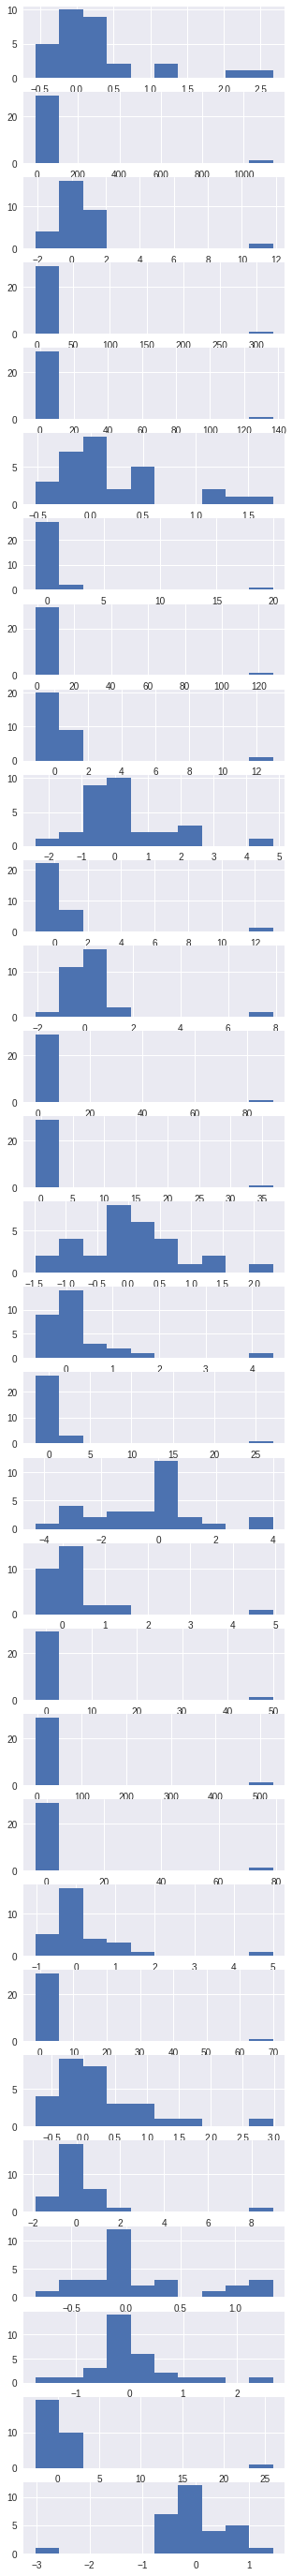

In [7]:
plt.rcParams["figure.figsize"] = (5,50)
fig, axs = plt.subplots(len(df.columns))
for i in range(0,len(df.columns)):
    axs[i].hist(df.iloc[i])

In [8]:
# df[df.iloc[-1]==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue', label='Valid=1')
# df[df.iloc[-1]==0]['fico'].plot.hist(bins=30,alpha=0.5, color='red', label='Valid=0')
# plt.legend(fontsize=15)
# plt.title ("Histogram of FICO score by approved or disapproved credit policies", fontsize=16)
# plt.xlabel("FICO score", fontsize=14)

In [9]:
from sklearn.model_selection import train_test_split
df_dropped = df.iloc[: , :-1]
X = df_dropped
y = df.iloc[:,-1:]
# y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2826   21]
 [  17  127]]
Accuracy of prediction: 0.987


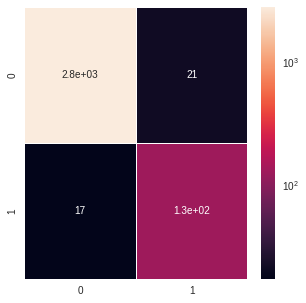

In [16]:
from matplotlib.colors import LogNorm, Normalize
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(cm,linewidth=1, annot=True, norm=LogNorm())
plt.show()

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2847
           1       0.86      0.88      0.87       144

    accuracy                           0.99      2991
   macro avg       0.93      0.94      0.93      2991
weighted avg       0.99      0.99      0.99      2991



In [18]:
# Use AUC(Area under curve) as evaluation metric as it is a binary classification problem
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9372841294930335

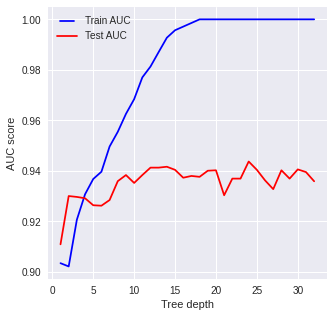

In [19]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)   
    train_pred = dt.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)   
    y_pred = dt.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
cmatrices = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train.values.ravel())
    rfc_pred = rfc.predict(X_test)
#     cm = confusion_matrix(y_test,rfc_pred)
#     accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    accuracy[i] = accuracy_score(y_test, rfc_pred)
    cmatrices[i] = confusion_matrix(y_test,rfc_pred)
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

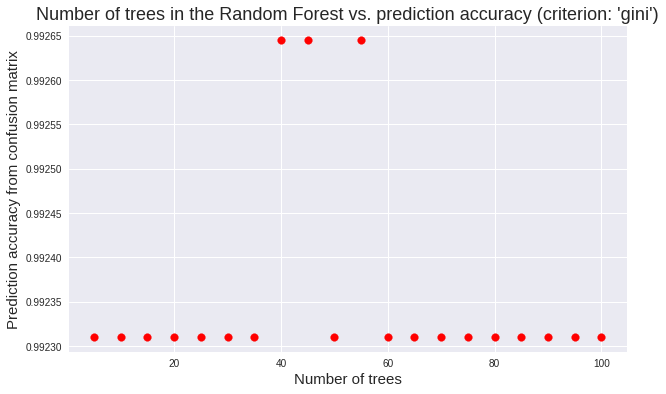

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

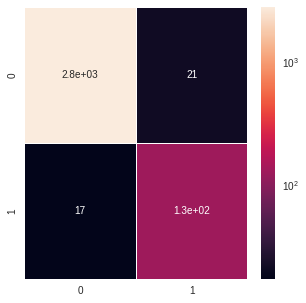

In [23]:
sns.heatmap(cm,linewidth=1, annot=True, norm=LogNorm())
plt.show()

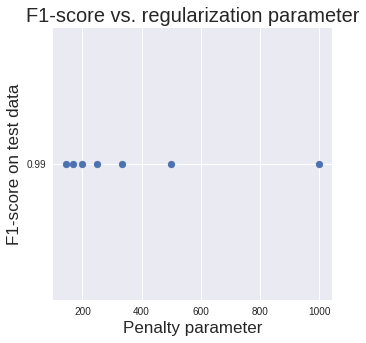

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=10
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
        logmodel[i] =LogisticRegression(C=i/100,tol=1e-4, max_iter=600,n_jobs=4)
        logmodel[i].fit(X_train,y_train.values.ravel())
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i
        
plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()



In [25]:
cm=confusion_matrix(y_test,predictions[1])
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2845    2]
 [  24  120]]
Accuracy of prediction: 0.991


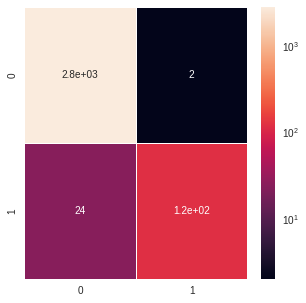

In [26]:
sns.heatmap(cm,linewidth=1, annot=True, norm=LogNorm())
plt.show()

In [27]:
'''  
1- Open titanc_train.csv
2- Remove any data samples with empty cells
3- Try to measure the correlation between 'Pclass' and 'Fare'
4- Try to measure the correlation between 'Pclass' and 'Survived'
5- Use variables below and C-Means (K-Means) clustering, try to cluster the data into 2 clusters
Variables: Survived, Pclass, Sex, Age, Fare, Embarked
6- Discuss the results
7- Repeat 5 and 6 for 4 clusters
'''

"  \n1- Open titanc_train.csv\n2- Remove any data samples with empty cells\n3- Try to measure the correlation between 'Pclass' and 'Fare'\n4- Try to measure the correlation between 'Pclass' and 'Survived'\n5- Use variables below and C-Means (K-Means) clustering, try to cluster the data into 2 clusters\nVariables: Survived, Pclass, Sex, Age, Fare, Embarked\n6- Discuss the results\n7- Repeat 5 and 6 for 4 clusters\n"

In [28]:
df_train = pd.read_csv('titanic_train.csv') # Training set is already available
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df_Pclass_Fare = df_train[["Pclass","Fare"]]
df_Pclass_Fare.corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


<AxesSubplot:>

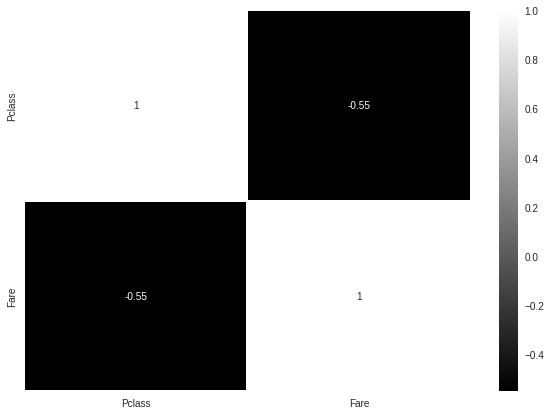

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df_Pclass_Fare.corr(),annot=True,linewidths=2, cmap="gray")

In [32]:
df_Pclass_Survived = df_train[["Pclass","Survived"]]
df_Pclass_Survived.corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


<AxesSubplot:>

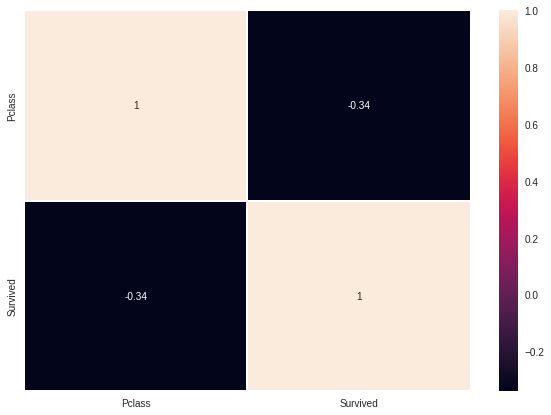

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df_Pclass_Survived.corr(),annot=True,linewidths=2)

In [34]:
from sklearn.cluster import KMeans

In [35]:
df_train_km = df_train
df_train_km.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df_train_km.drop(['SibSp','Parch','Cabin'],axis=1,inplace=True)
sex = pd.get_dummies(df_train_km['Sex'],drop_first=True)
embark = pd.get_dummies(df_train_km['Embarked'],drop_first=True)
df_train_km.drop(['Sex','Embarked'],axis=1,inplace=True)
df_train_km = pd.concat([df_train_km,sex,embark],axis=1)

Text(0.5, 0, 'Passenger class')

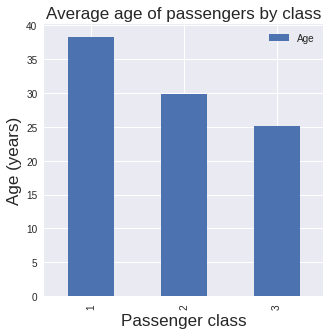

In [36]:
f_class_Age=df_train_km.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

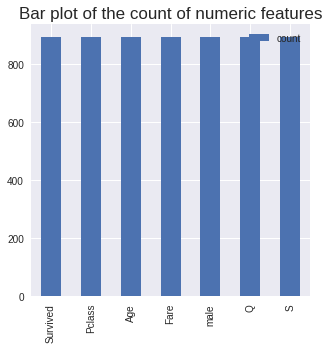

In [37]:
a=list(f_class_Age['Age'])
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age
    
df_train_km['Age'] = df_train_km[['Age','Pclass']].apply(impute_age,axis=1)
d=df_train_km.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [38]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=50,n_init=10)
kmeans.fit(df_train_km)

KMeans(max_iter=50, n_clusters=2, tol=0.001)

In [39]:
clus_cent=kmeans.cluster_centers_
df_desc=pd.DataFrame(df_train_km.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)

In [40]:
def converter(cluster):
    return cluster

In [41]:
df1=df_train_km # Create a copy of data frame so that original data frame does not get 'corrupted' with the cluster index
df1['Cluster'] = df_train_km['Survived'].apply(converter)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df1['Cluster'],kmeans.labels_))
print(classification_report(df1['Cluster'],kmeans.labels_))

[[535  14]
 [303  39]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       549
           1       0.74      0.11      0.20       342

    accuracy                           0.64       891
   macro avg       0.69      0.54      0.48       891
weighted avg       0.68      0.64      0.55       891



In [43]:
df_survived=df_train_km[df_train_km['Survived']==1]
df_non_survived=df_train_km[df_train_km['Survived']==0]

In [44]:
df_survived=df_train_km[df_train_km['Survived']==1]
df_non_survived=df_train_km[df_train_km['Survived']==0]

In [45]:
a=np.array(kmclus.diff().iloc[1])
centroid_diff = pd.DataFrame(a,columns=['K-means cluster centroid-distance'],index=df_desc.columns)
centroid_diff['Mean of corresponding entity (survived)']=np.array(df_survived.drop('Survived',axis=1).mean())
centroid_diff['Mean of corresponding entity (non_survived)']=np.array(df_non_survived.drop('Survived',axis=1).mean())


### 4 clusters

In [46]:
kmeans = KMeans(n_clusters=4,verbose=0,tol=1e-3,max_iter=50,n_init=10)
kmeans.fit(df_train_km.drop('Survived',axis=1))

KMeans(max_iter=50, n_clusters=4, tol=0.001)

In [47]:
clus_cent=kmeans.cluster_centers_
df_desc=pd.DataFrame(df_train_km.drop('Survived',axis=1).describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)

In [48]:
def converter(cluster):
    return cluster

In [54]:
df1=df_train_km # Create a copy of data frame so that original data frame does not get 'corrupted' with the cluster index
df1['Cluster'] = df_train_km['Survived'].apply(converter)
df1.head()

,Survived,Pclass,Age,Fare,male,Q,S,Cluster
0,0,3,22.0,7.2500,1,0,1,0
1,1,1,38.0,71.2833,0,0,0,1
2,1,3,26.0,7.9250,0,0,1,1
3,1,1,35.0,53.1000,0,0,1,1
4,0,3,35.0,8.0500,1,0,1,0


[[494  46   0   9]
 [231  89   3  19]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       549
           1       0.66      0.26      0.37       342
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.65       891
   macro avg       0.34      0.29      0.29       891
weighted avg       0.67      0.65      0.62       891



/home/mpheng/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mpheng/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mpheng/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

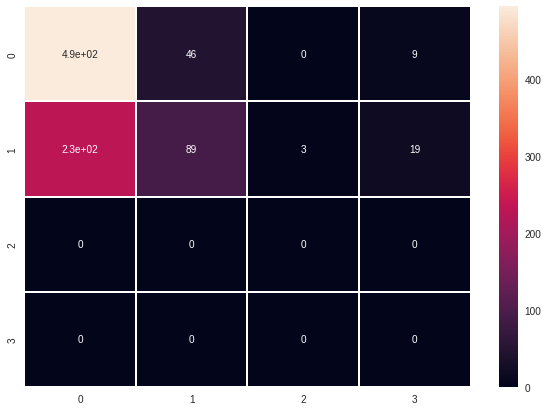

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df1['Cluster'],kmeans.labels_))
print(classification_report(df1['Cluster'],kmeans.labels_))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(df1['Cluster'],kmeans.labels_),annot=True,linewidths=2)

In [51]:
df_survived=df_train_km[df_train_km['Survived']==1]
df_non_survived=df_train_km[df_train_km['Survived']==0]

In [52]:
a=np.array(kmclus.diff().iloc[1])
centroid_diff = pd.DataFrame(a,columns=['K-means cluster centroid-distance'],index=df_desc.columns)
centroid_diff['Mean of corresponding entity (survived)']=np.array(df_survived.drop('Survived',axis=1).mean())
centroid_diff['Mean of corresponding entity (non_survived)']=np.array(df_non_survived.drop('Survived',axis=1).mean())